In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('laptop_data_cleaned.csv')
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [4]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['TypeName'] = le.fit_transform(df['TypeName'])
df['Cpu_brand'] = le.fit_transform(df['Cpu_brand'])
df['Gpu_brand'] = le.fit_transform(df['Gpu_brand'])
df['Os'] = le.fit_transform(df['Os'])

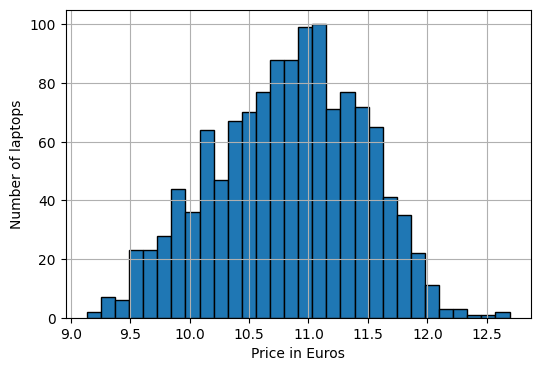

In [14]:
plt.figure(figsize=(6,4))
df['Price'].hist(bins=30, edgecolor='black')
plt.xlabel('Price in Euros')
plt.ylabel('Number of laptops')
plt.show()

In [15]:
X = df.drop('Price', axis=1).values
y = df['Price'].values
print(X.shape, y.shape)

(1273, 12) (1273,)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1018, 12) (255, 12) (1018,) (255,)


In [17]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = mlr.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.1316087198610983
R-squared: 0.6677584828673433


In [23]:
print(f"Coefficients: {mlr.coef_}")
print(f"Intercept: {mlr.intercept_}")

Coefficients: [ 6.96502879e-03  4.49932524e-02  4.19544357e-02  5.20553053e-02
  5.70109746e-02  8.32169375e-02  3.19156046e-03 -2.12227983e-02
  2.00896351e-05  9.05244642e-04  1.65339297e-01  1.49837104e-01]
Intercept: 9.116092832841607


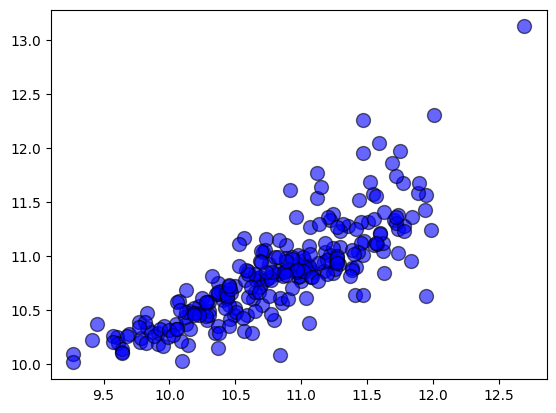

In [25]:
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, s=100, label='Scatter plot of actual vs predicted values')

In [ ]:
residuals = y_test - y_pred
residuals

array([-0.22103542,  0.36298748,  0.20664156,  0.07763128,  0.17876389,
        0.87998676, -0.64509149, -0.24162836,  0.4953348 ,  0.38394351,
       -0.12787927, -0.034507  , -0.04841276, -0.20664533,  0.19276732,
       -0.4146859 ,  0.23065673, -0.32302242,  0.74308245,  0.38779304,
       -0.58171111, -0.32340766, -0.18697161,  0.34179918, -0.43263417,
        0.47932061,  0.0343077 , -0.0075156 ,  0.78055584, -0.42968161,
       -0.12021935, -0.12166227, -0.12264694, -0.30701183,  0.14250139,
       -0.22318203, -0.37831958,  0.31137846,  0.37093469, -0.27051144,
       -0.50673438,  0.4850399 ,  0.13335836, -0.26171531, -0.0372879 ,
        0.46076149,  0.06407533, -0.17496341,  0.06281124, -0.32664805,
        0.77586446,  0.70264373, -0.35428234, -0.23435471,  0.76032871,
        0.42783459,  0.83130426, -0.34635689, -0.19061735, -0.43310935,
       -0.22450075,  0.23723846, -0.59631242, -0.68778576,  0.51447285,
       -0.02516148, -0.36958352,  0.06273516,  0.03317898,  0.23

<Axes: ylabel='Count'>

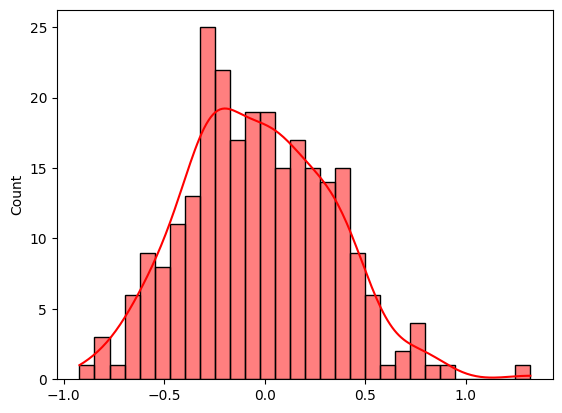

In [31]:
import seaborn as sns
sns.histplot(residuals, color='red', bins=30, label='Residuals distribution', kde=True)